<a href="https://colab.research.google.com/github/LuisRubert/predicciones-ventas/blob/main/Proyecto_1_parte_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpieza de datos

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [144]:
df=pd.read_csv("/content/sales_predictions.csv")

In [145]:
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [147]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [148]:

#al no haber datos duplicanos no tenemos que elimnar, sin embargo ya tenes la información.
df.duplicated().sum()


0

In [149]:
#Revision de vacios
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [150]:
filas_nulas = df[df.isnull().any(axis=1)]

In [151]:
#identificamos muchos valores faltantes en dos columnas, los cuales no tenemos manera de saber cuales son. Obtaremos por eliminar debido a que no son necesarios para la prediccion de vemtas.
columnas_a_eliminar = ['Item_Weight', 'Outlet_Size', "Item_Identifier"]

In [152]:
df = df.drop(columns=columnas_a_eliminar)

In [153]:
df["Item_Outlet_Sales"]

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [154]:
df["Item_Outlet_Sales"].isnull().sum()

0

In [155]:
df = df[pd.to_numeric(df['Item_Outlet_Sales'], errors='coerce').notnull()]

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           8523 non-null   object 
 1   Item_Visibility            8523 non-null   float64
 2   Item_Type                  8523 non-null   object 
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Identifier          8523 non-null   object 
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Location_Type       8523 non-null   object 
 7   Outlet_Type                8523 non-null   object 
 8   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 599.4+ KB


# Visualización

In [166]:
columnas_relevantes = ['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']
df_relevante = df[columnas_relevantes]

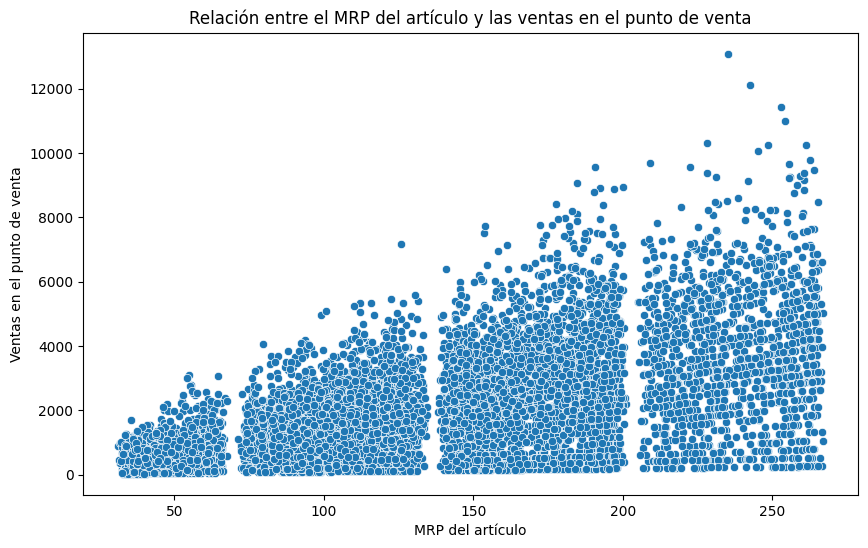

In [167]:
# Diagrama de dispersión para visualizar la relación entre Item_MRP(recio Máximo Minorista (precio de lista) del producto) y Item_Outlet_Sales(Las ventas del producto en la tienda particular. Esta es la variable objetivo que se debe predecir.)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_relevante, x='Item_MRP', y='Item_Outlet_Sales')
plt.title('Relación entre el MRP del artículo y las ventas en el punto de venta')
plt.xlabel('MRP del artículo')
plt.ylabel('Ventas en el punto de venta')
plt.show()

Este gráfico muestra la relación entre el precio máximo de venta (MRP) de un artículo y las ventas en el punto de venta. La dispersión de puntos en el gráfico nos permite observar si hay alguna tendencia o patrón entre el precio del artículo y las ventas. Si existe una relación positiva fuerte entre el precio y las ventas, podríamos inferir que los artículos más caros tienden a venderse más, lo que podría ayudar a predecir futuras ventas en función del precio.
     

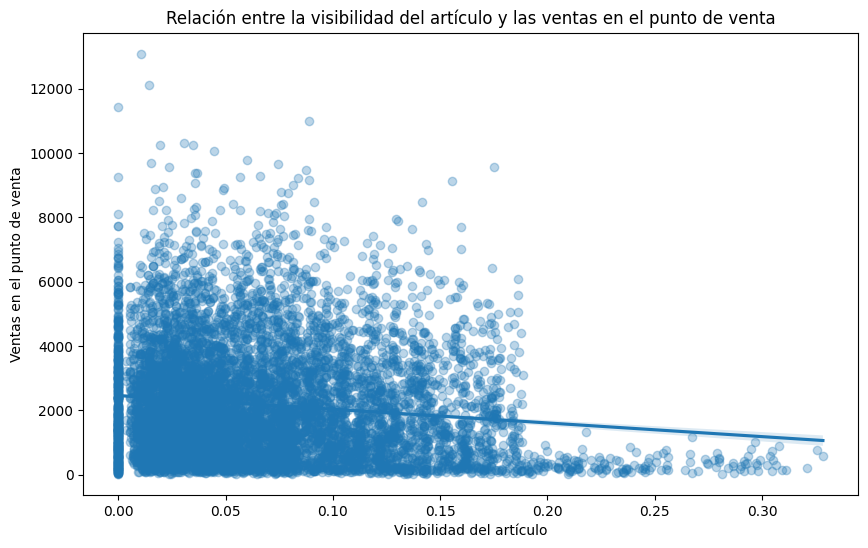

In [158]:
# Diagrama de regresión para visualizar la relación entre Item_Visibility(El porcentaje de área total de visualización de todos los productos en la tienda asignados a este producto particular) y Item_Outlet_Sales(Las ventas del producto en la tienda particular)
plt.figure(figsize=(10, 6))
sns.regplot(data=df_relevante, x='Item_Visibility', y='Item_Outlet_Sales', scatter_kws={'alpha':0.3})
plt.title('Relación entre la visibilidad del artículo y las ventas en el punto de venta')
plt.xlabel('Visibilidad del artículo')
plt.ylabel('Ventas en el punto de venta')
plt.show()

Este gráfico muestra la relación entre la visibilidad de un artículo en el punto de venta y las ventas en ese punto de venta. La línea de regresión trazada en el gráfico indica la tendencia general de la relación entre la visibilidad y las ventas. Si la visibilidad tiene un impacto significativo en las ventas, podríamos utilizar esta información para predecir las ventas futuras de un artículo basándonos en su visibilidad en el punto de venta.
     

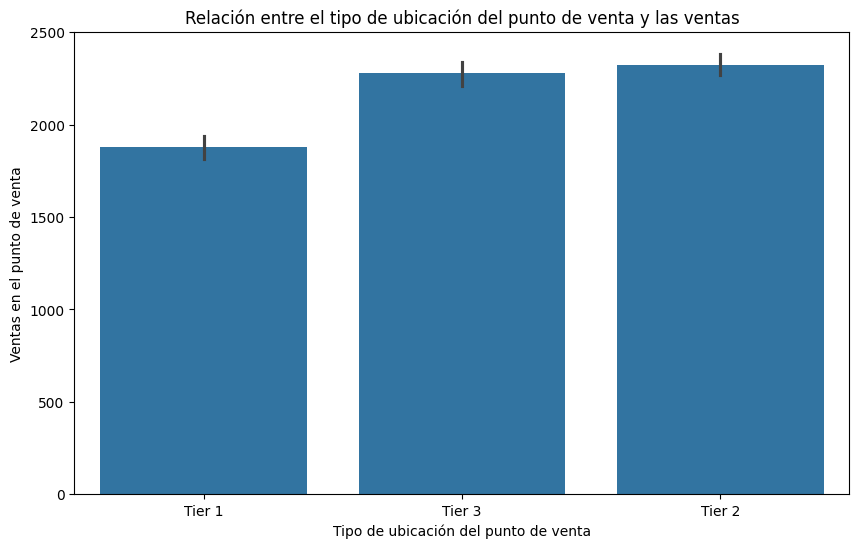

In [159]:
# Diagrama de barras para visualizar la relación entre Outlet_Location_Type(El tipo de área donde se ubica la tienda) y Item_Outlet_Sales(Las ventas del producto en la tienda particular)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_relevante, x='Outlet_Location_Type', y='Item_Outlet_Sales')
plt.title('Relación entre el tipo de ubicación del punto de venta y las ventas')
plt.xlabel('Tipo de ubicación del punto de venta')
plt.ylabel('Ventas en el punto de venta')
plt.show()

Este gráfico muestra la relación entre el tipo de ubicación del punto de venta y las ventas en ese punto de venta. Al comparar las ventas en diferentes tipos de ubicaciones de puntos de venta, podemos identificar si hay alguna diferencia significativa en las ventas entre ellas. Esta información puede ayudar a comprender mejor qué factores están contribuyendo a las diferencias en las ventas y podría utilizarse para predecir las ventas futuras en ubicaciones similares.
     

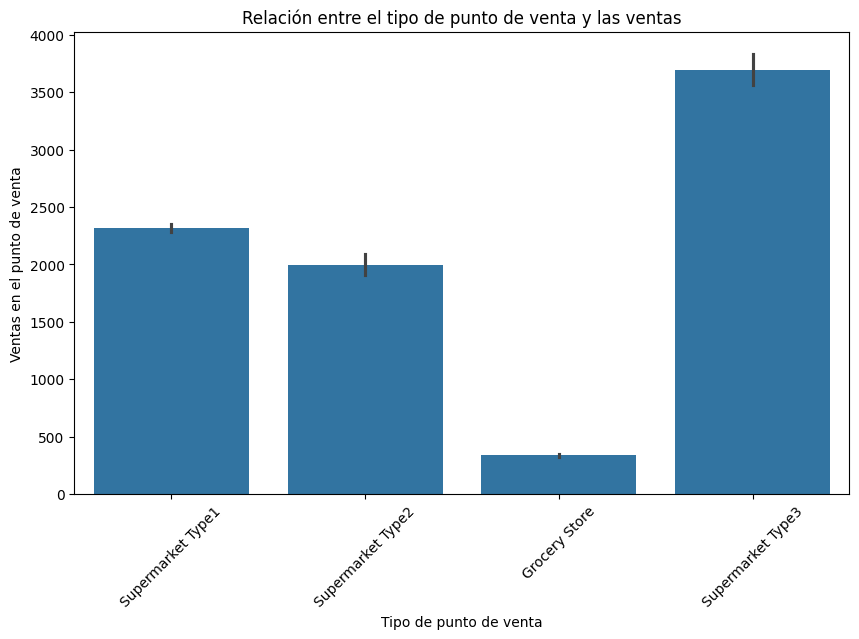

In [160]:
# Diagrama de barras para visualizar la relación entre Outlet_Type(Si la tienda es un almacén o algún tipo de supermercado) y Item_Outlet_Sales(Las ventas del producto en la tienda particular)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_relevante, x='Outlet_Type', y='Item_Outlet_Sales')
plt.title('Relación entre el tipo de punto de venta y las ventas')
plt.xlabel('Tipo de punto de venta')
plt.ylabel('Ventas en el punto de venta')
plt.xticks(rotation=45)
plt.show()

Este gráfico muestra la relación entre el tipo de punto de venta y las ventas en ese punto de venta. Al comparar las ventas en diferentes tipos de puntos de venta, como supermercados versus tiendas de conveniencia, podemos identificar si ciertos tipos de puntos de venta tienen un impacto significativo en las ventas. Esta información podría ser útil para predecir las ventas futuras en función del tipo de punto de venta en el que se vende un artículo

# Regresión lineal

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


In [169]:
columnas_categoricas = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']
columnas_numericas = ['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']


In [170]:
preprocessor = make_column_transformer(
    (OneHotEncoder(), columnas_categoricas),
    remainder='passthrough'
)

In [171]:
# Crear el modelo de regresión lineal
modelo = make_pipeline(
    preprocessor,
    LinearRegression()
)

In [172]:
X = df[columnas_categoricas + columnas_numericas]
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [173]:
# Entrenar el modelo
modelo.fit(X_train, y_train)

# Evaluar el modelo
y_pred = modelo.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 1132.6243809246275
